What is a partial dependence plot? Can you explain it intuitively with a simple example? We can look at the previous example later, but first, let me explain the concept intuitively. Let's use a simple example to help understand this.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

A partial dependence plot (PDP) helps us understand how a specific feature affects the predictions of a machine learning model, while accounting for the average effect of all other features.

Let me explain this with a simple example:

Imagine you have a model that predicts house prices based on several features: square footage, number of bedrooms, neighborhood, and age of the house.

You might wonder: "How does square footage specifically impact the predicted price, regardless of other factors?"

A partial dependence plot would:
1. Take different values of square footage (say from 500 to 3000 sq ft)
2. For each value, make predictions using your actual dataset but replacing the original square footage values with this specific value
3. Average all these predictions
4. Plot these averages against the square footage values

The resulting curve shows you how the predicted house price changes as you vary just the square footage, while averaging out the effects of bedrooms, neighborhood, and age.

Would you like me to explain how to interpret these plots, or would you prefer a more technical explanation of how they're calculated?

Let's make a plan for understanding partial dependence plots. We'll cover all the important sections, show how to make a simple example dataset, how to plot it, how to interpret it, and what all the components mean. After going through each step, one should be very well able to understand partial dependence plots.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->


1. **Concept basics**
   - What are partial dependence plots?
   - Why are they useful for model interpretation?
   - How do they compare to other interpretation methods?

2. **Creating an example dataset**
   - Generate a synthetic dataset with clear feature relationships
   - Explore the relationships in the raw data
   - Split the data for training

3. **Building a model**
   - Train a model (like random forest or gradient boosting)
   - Evaluate model performance
   - Discuss why the model's complexity makes interpretation challenging

4. **Generating partial dependence plots**
   - Calculate PDPs for individual features
   - Create 2D PDPs to show interaction effects
   - Tools and libraries for computing PDPs

5. **Interpreting the plots**
   - Reading the y-axis (predicted response)
   - Understanding feature impact and direction
   - Identifying non-linear relationships
   - Spotting interaction effects

6. **Advanced considerations**
   - Limitations of PDPs
   - Alternative methods (ICE plots, SHAP values)
   - Best practices and pitfalls



1. **Concept basics**
   - What are partial dependence plots?
   - Why are they useful for model interpretation?
   - How do they compare to other interpretation methods?

2. **Creating an example dataset**
   - Generate a synthetic dataset with clear feature relationships
   - Explore the relationships in the raw data
   - Split the data for training

3. **Building a model**
   - Train a model (like random forest or gradient boosting)
   - Evaluate model performance
   - Discuss why the model's complexity makes interpretation challenging

4. **Generating partial dependence plots**
   - Calculate PDPs for individual features
   - Create 2D PDPs to show interaction effects
   - Tools and libraries for computing PDPs

5. **Interpreting the plots**
   - Reading the y-axis (predicted response)
   - Understanding feature impact and direction
   - Identifying non-linear relationships
   - Spotting interaction effects

6. **Advanced considerations**
   - Limitations of PDPs
   - Alternative methods (ICE plots, SHAP values)
   - Best practices and pitfalls


please use prose not fancy languages always give intuitive explanation 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's a good point. Let's simplify our approach and focus on clear, intuitive explanations without unnecessary jargon. 

Let's start with understanding what partial dependence plots are in simple terms. Would you like me to begin with the concept basics using everyday language and practical examples?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's talk about partial dependence plots in simple terms.

When you build a machine learning model, it's often like a black box - you can't easily see how it makes decisions. Partial dependence plots help us peek inside this black box to understand how each feature affects the model's predictions.

Think of it this way: imagine you have a model that predicts house prices based on size, age, location, and number of bedrooms. You might wonder, "How does just the size affect the price, regardless of all other factors?" A partial dependence plot answers exactly this question.

The plot shows how the predicted price changes as you vary just the house size, while keeping the effect of all other features "averaged out." This helps you understand if bigger houses always lead to higher predicted prices, or if there's a point where extra space doesn't matter much anymore.

Does this basic concept make sense so far?

yes, go on.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now let's talk about why partial dependence plots are useful.

When working with complex models like random forests or gradient boosting, it's hard to understand how they make decisions just by looking at the model parameters. Partial dependence plots give us a visual way to interpret these models.

The main benefits are:

1. They show if a feature has a linear, non-linear, or no effect on predictions
2. They reveal the direction of the relationship (positive or negative)
3. They help identify threshold points where a feature's impact changes

For example, in our house price model, a partial dependence plot might show that prices increase steadily with house size up to 2,500 square feet, but after that, additional space has minimal impact on the predicted price.

These plots are especially valuable when you need to explain your model to non-technical stakeholders or when you want to check if the model has learned relationships that match your domain knowledge.

Would you like to move on to creating a simple example dataset to see this in action?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's create a simple example dataset to demonstrate partial dependence plots. 

For our example, we'll make a dataset about student performance on a test. We'll say the test score depends on:
- Hours studied
- Hours of sleep the night before
- Previous test average
- Whether they had breakfast (yes/no)

We'll create this with a clear pattern so we can verify if our partial dependence plots capture the relationships correctly.

Would you like me to show you how to generate this dataset using Python? Or would you prefer I just describe what the dataset would look like and move forward with the explanation?

i ll go with option 1, let make the dataset

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's create our dataset using Python. Here's how we can generate a synthetic dataset about student test performance:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for 500 students
n_samples = 500

# Create features
hours_studied = np.random.uniform(0, 10, n_samples)  # Between 0 and 10 hours
hours_sleep = np.random.uniform(4, 10, n_samples)    # Between 4 and 10 hours
previous_avg = np.random.uniform(50, 100, n_samples) # Between 50 and 100
had_breakfast = np.random.choice([0, 1], n_samples)  # 0=No, 1=Yes

# Create target variable (test score) with specific relationships
test_score = (
    5 * hours_studied +                  # Linear positive effect
    2 * (hours_sleep - 7)**2 +           # Nonlinear effect (optimal at 7 hours)
    0.2 * previous_avg +                 # Small linear effect
    5 * had_breakfast +                  # Breakfast gives a 5-point boost
    np.random.normal(0, 5, n_samples)    # Random noise
)

# Clip scores to be between 0 and 100
test_score = np.clip(test_score, 0, 100)

# Create a DataFrame
data = pd.DataFrame({
    'hours_studied': hours_studied,
    'hours_sleep': hours_sleep,
    'previous_avg': previous_avg,
    'had_breakfast': had_breakfast,
    'test_score': test_score
})

# Display the first few rows
print(data.head())
```

Would you like to run this code to create the dataset? After we have the dataset, we can explore the relationships between features and the target variable before moving on to building a model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for 500 students
n_samples = 500

# Create features
hours_studied = np.random.uniform(0, 10, n_samples)  # Between 0 and 10 hours
hours_sleep = np.random.uniform(4, 10, n_samples)    # Between 4 and 10 hours
previous_avg = np.random.uniform(50, 100, n_samples) # Between 50 and 100
had_breakfast = np.random.choice([0, 1], n_samples)  # 0=No, 1=Yes

# Create target variable (test score) with specific relationships
test_score = (
    5 * hours_studied +                  # Linear positive effect
    2 * (hours_sleep - 7)**2 +           # Nonlinear effect (optimal at 7 hours)
    0.2 * previous_avg +                 # Small linear effect
    5 * had_breakfast +                  # Breakfast gives a 5-point boost
    np.random.normal(0, 5, n_samples)    # Random noise
)

# Clip scores to be between 0 and 100
test_score = np.clip(test_score, 0, 100)

# Create a DataFrame
data = pd.DataFrame({
    'hours_studied': hours_studied,
    'hours_sleep': hours_sleep,
    'previous_avg': previous_avg,
    'had_breakfast': had_breakfast,
    'test_score': test_score
})

# Display the first few rows
print(data.head())


   hours_studied  hours_sleep  previous_avg  had_breakfast  test_score
0       3.745401     8.188970     59.256646              1   31.011078
1       9.507143     7.216578     77.095047              1   68.965337
2       7.319939     5.857166     93.647292              1   62.864747
3       5.986585     8.882770     86.611244              1   62.241277
4       1.560186     8.108387     90.328057              0   28.921489


In [ ]:
data

,hours_studied,hours_sleep,previous_avg,had_breakfast,test_score
0,3.745,8.189,59.257,1,31.011
1,9.507,7.217,77.095,1,68.965
2,7.320,5.857,93.647,1,62.865
3,5.987,8.883,86.611,1,62.241
4,1.560,8.108,90.328,0,28.921
5,1.560,4.976,82.939,0,27.718
6,0.581,9.466,84.614,1,42.968
7,8.662,8.935,92.460,0,68.498
8,6.011,9.699,62.483,1,61.983
9,7.081,8.354,74.471,0,49.300


next step

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now that we have our dataset, let's explore it a bit to understand the relationships between our features and the test scores. This will help us verify if our partial dependence plots later capture these relationships correctly.

Let's create some simple scatter plots to visualize how each feature relates to the test score:

```python
# Set up a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot hours studied vs test score
axes[0, 0].scatter(data['hours_studied'], data['test_score'], alpha=0.5)
axes[0, 0].set_title('Hours Studied vs Test Score')
axes[0, 0].set_xlabel('Hours Studied')
axes[0, 0].set_ylabel('Test Score')

# Plot hours sleep vs test score
axes[0, 1].scatter(data['hours_sleep'], data['test_score'], alpha=0.5)
axes[0, 1].set_title('Hours of Sleep vs Test Score')
axes[0, 1].set_xlabel('Hours of Sleep')
axes[0, 1].set_ylabel('Test Score')

# Plot previous average vs test score
axes[1, 0].scatter(data['previous_avg'], data['test_score'], alpha=0.5)
axes[1, 0].set_title('Previous Average vs Test Score')
axes[1, 0].set_xlabel('Previous Average')
axes[1, 0].set_ylabel('Test Score')

# Plot breakfast vs test score (boxplot for categorical)
axes[1, 1].boxplot([data[data['had_breakfast']==0]['test_score'], 
                    data[data['had_breakfast']==1]['test_score']])
axes[1, 1].set_title('Breakfast vs Test Score')
axes[1, 1].set_xlabel('Had Breakfast (0=No, 1=Yes)')
axes[1, 1].set_ylabel('Test Score')
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()
```

Would you like to run this code to see the relationships in our data?

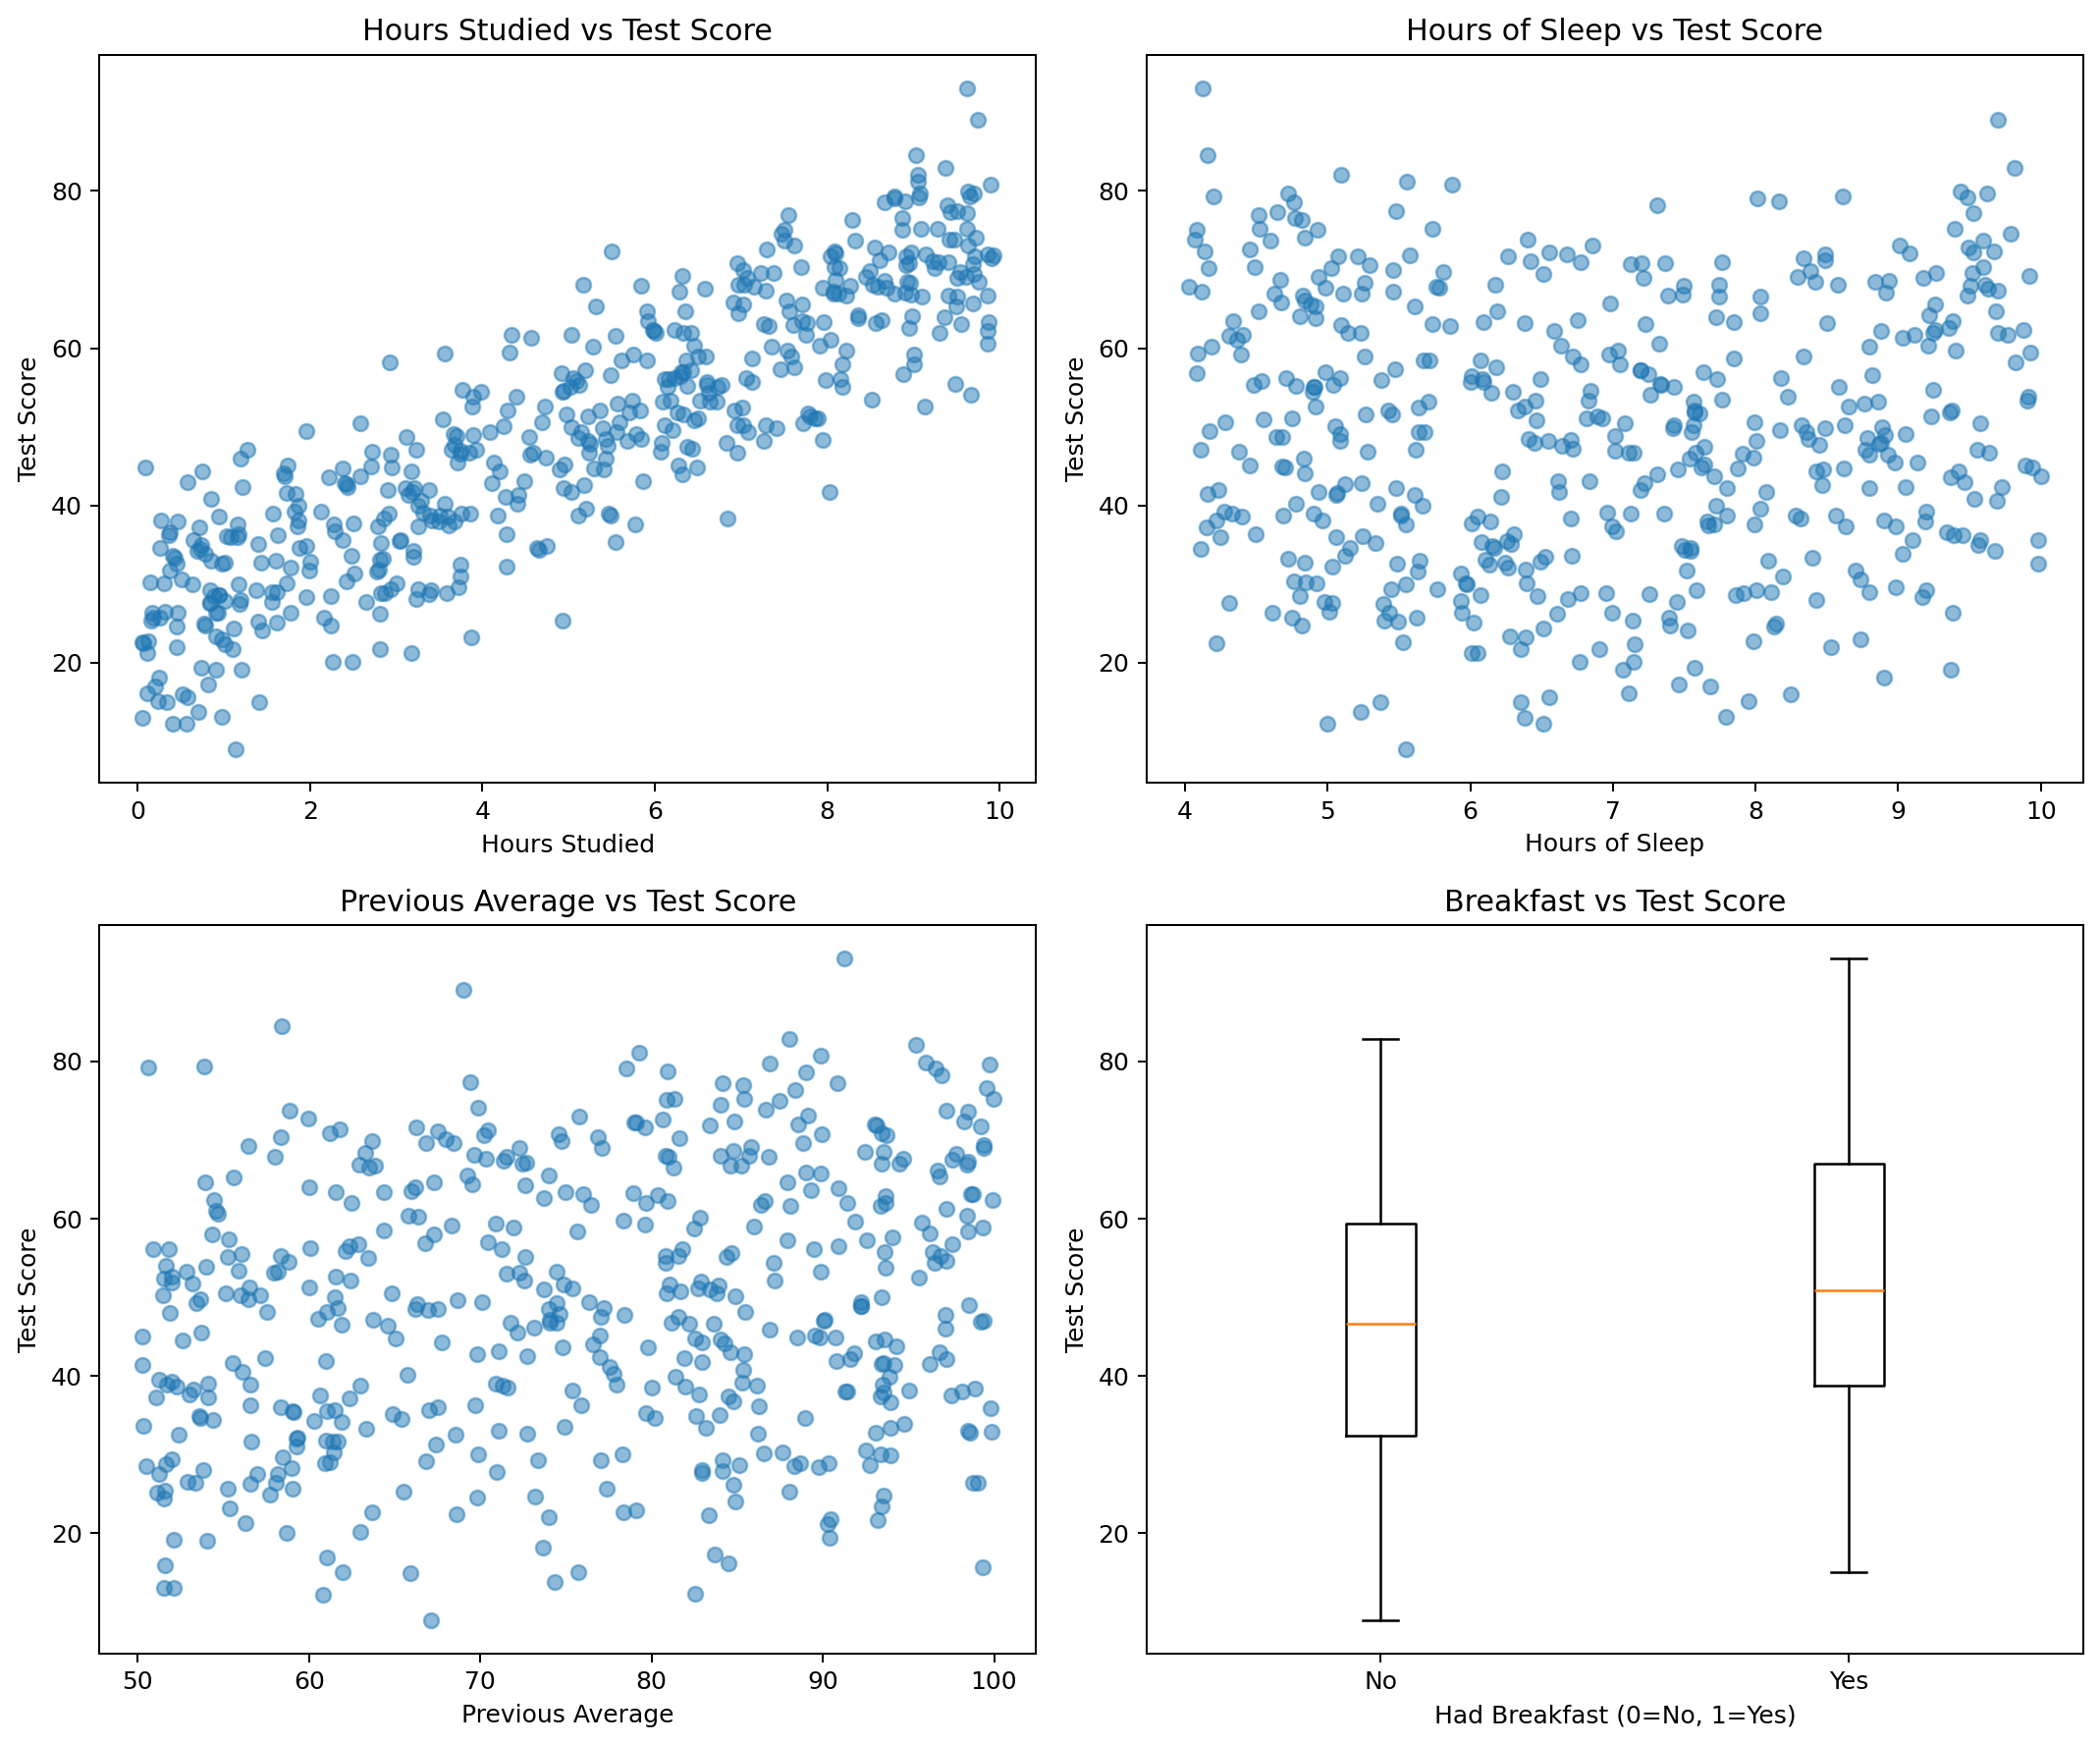

In [ ]:
# Set up a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot hours studied vs test score
axes[0, 0].scatter(data['hours_studied'], data['test_score'], alpha=0.5)
axes[0, 0].set_title('Hours Studied vs Test Score')
axes[0, 0].set_xlabel('Hours Studied')
axes[0, 0].set_ylabel('Test Score')

# Plot hours sleep vs test score
axes[0, 1].scatter(data['hours_sleep'], data['test_score'], alpha=0.5)
axes[0, 1].set_title('Hours of Sleep vs Test Score')
axes[0, 1].set_xlabel('Hours of Sleep')
axes[0, 1].set_ylabel('Test Score')

# Plot previous average vs test score
axes[1, 0].scatter(data['previous_avg'], data['test_score'], alpha=0.5)
axes[1, 0].set_title('Previous Average vs Test Score')
axes[1, 0].set_xlabel('Previous Average')
axes[1, 0].set_ylabel('Test Score')

# Plot breakfast vs test score (boxplot for categorical)
axes[1, 1].boxplot([data[data['had_breakfast']==0]['test_score'], 
                    data[data['had_breakfast']==1]['test_score']])
axes[1, 1].set_title('Breakfast vs Test Score')
axes[1, 1].set_xlabel('Had Breakfast (0=No, 1=Yes)')
axes[1, 1].set_ylabel('Test Score')
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


next step

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Looking at these plots, we can observe the relationships in our data:

1. **Hours Studied vs Test Score**: There's a clear positive linear relationship - more study time generally leads to higher test scores.

2. **Hours of Sleep vs Test Score**: This relationship isn't as clear in the scatter plot. Remember we designed this to be non-linear (optimal at 7 hours), which is hard to see in a simple scatter plot.

3. **Previous Average vs Test Score**: The relationship appears weak, which matches our design (we gave it a small coefficient of 0.2).

4. **Breakfast vs Test Score**: Students who had breakfast (Yes) tend to score higher than those who didn't (No), as shown by the higher median in the boxplot.

Now let's build a model using this data. We'll use a Random Forest, which is a good example of a complex "black box" model where interpretation tools like partial dependence plots are valuable:

```python
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target (y)
X = data[['hours_studied', 'hours_sleep', 'previous_avg', 'had_breakfast']]
y = data['test_score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
```

Would you like to run this code to build and evaluate the model?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target (y)
X = data[['hours_studied', 'hours_sleep', 'previous_avg', 'had_breakfast']]
y = data['test_score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 41.37
R² Score: 0.82


next step

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Our Random Forest model is performing well with an R² score of 0.82, which means it's capturing about 82% of the variance in the test scores.

Now, let's create partial dependence plots to understand how each feature affects the model's predictions. We'll use scikit-learn's `plot_partial_dependence` function:

```python
from sklearn.inspection import plot_partial_dependence, partial_dependence

# Create a figure
fig, ax = plt.subplots(figsize=(12, 10))

# Create partial dependence plots for all features
features_to_plot = [(0,), (1,), (2,), (3,)]  # Indices of our features
feature_names = ['hours_studied', 'hours_sleep', 'previous_avg', 'had_breakfast']

# Generate and plot the partial dependence
display = plot_partial_dependence(
    model, X_train, features_to_plot, 
    feature_names=feature_names,
    n_jobs=3, grid_resolution=50,
    ax=ax
)

plt.tight_layout()
plt.show()
```

This will create a partial dependence plot for each feature. Let's run this code to generate the plots and then we'll interpret them.

In [ ]:
from sklearn.inspection import plot_partial_dependence, partial_dependence

# Create a figure
fig, ax = plt.subplots(figsize=(12, 10))

# Create partial dependence plots for all features
features_to_plot = [(0,), (1,), (2,), (3,)]  # Indices of our features
feature_names = ['hours_studied', 'hours_sleep', 'previous_avg', 'had_breakfast']

# Generate and plot the partial dependence
display = plot_partial_dependence(
    model, X_train, features_to_plot, 
    feature_names=feature_names,
    n_jobs=3, grid_resolution=50,
    ax=ax
)

plt.tight_layout()
plt.show()


---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
Cell In[1], line 1
----> 1 from sklearn.inspection import plot_partial_dependence, partial_dependence
      3 # Create a figure
      4 fig, ax = plt.subplots(figsize=(12, 10))

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/app/data/.local/lib/python3.11/site-packages/sklearn/inspection/__init__.py)


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/app/data/.local/lib/python3.11/site-packages/sklearn/inspection/__init__.py)

help me fix it please..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

It looks like there's an issue with the `plot_partial_dependence` function. In newer versions of scikit-learn, this function has been replaced. Let's use the updated approach:

```python
from sklearn.inspection import PartialDependenceDisplay

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Create partial dependence plots for all features
features_to_plot = [0, 1, 2, 3]  # Indices of our features
feature_names = ['hours_studied', 'hours_sleep', 'previous_avg', 'had_breakfast']

# Generate and plot the partial dependence
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot, 
    feature_names=feature_names,
    ax=axes
)

plt.tight_layout()
plt.show()
```

This should work with the current version of scikit-learn. Let's try this approach instead.

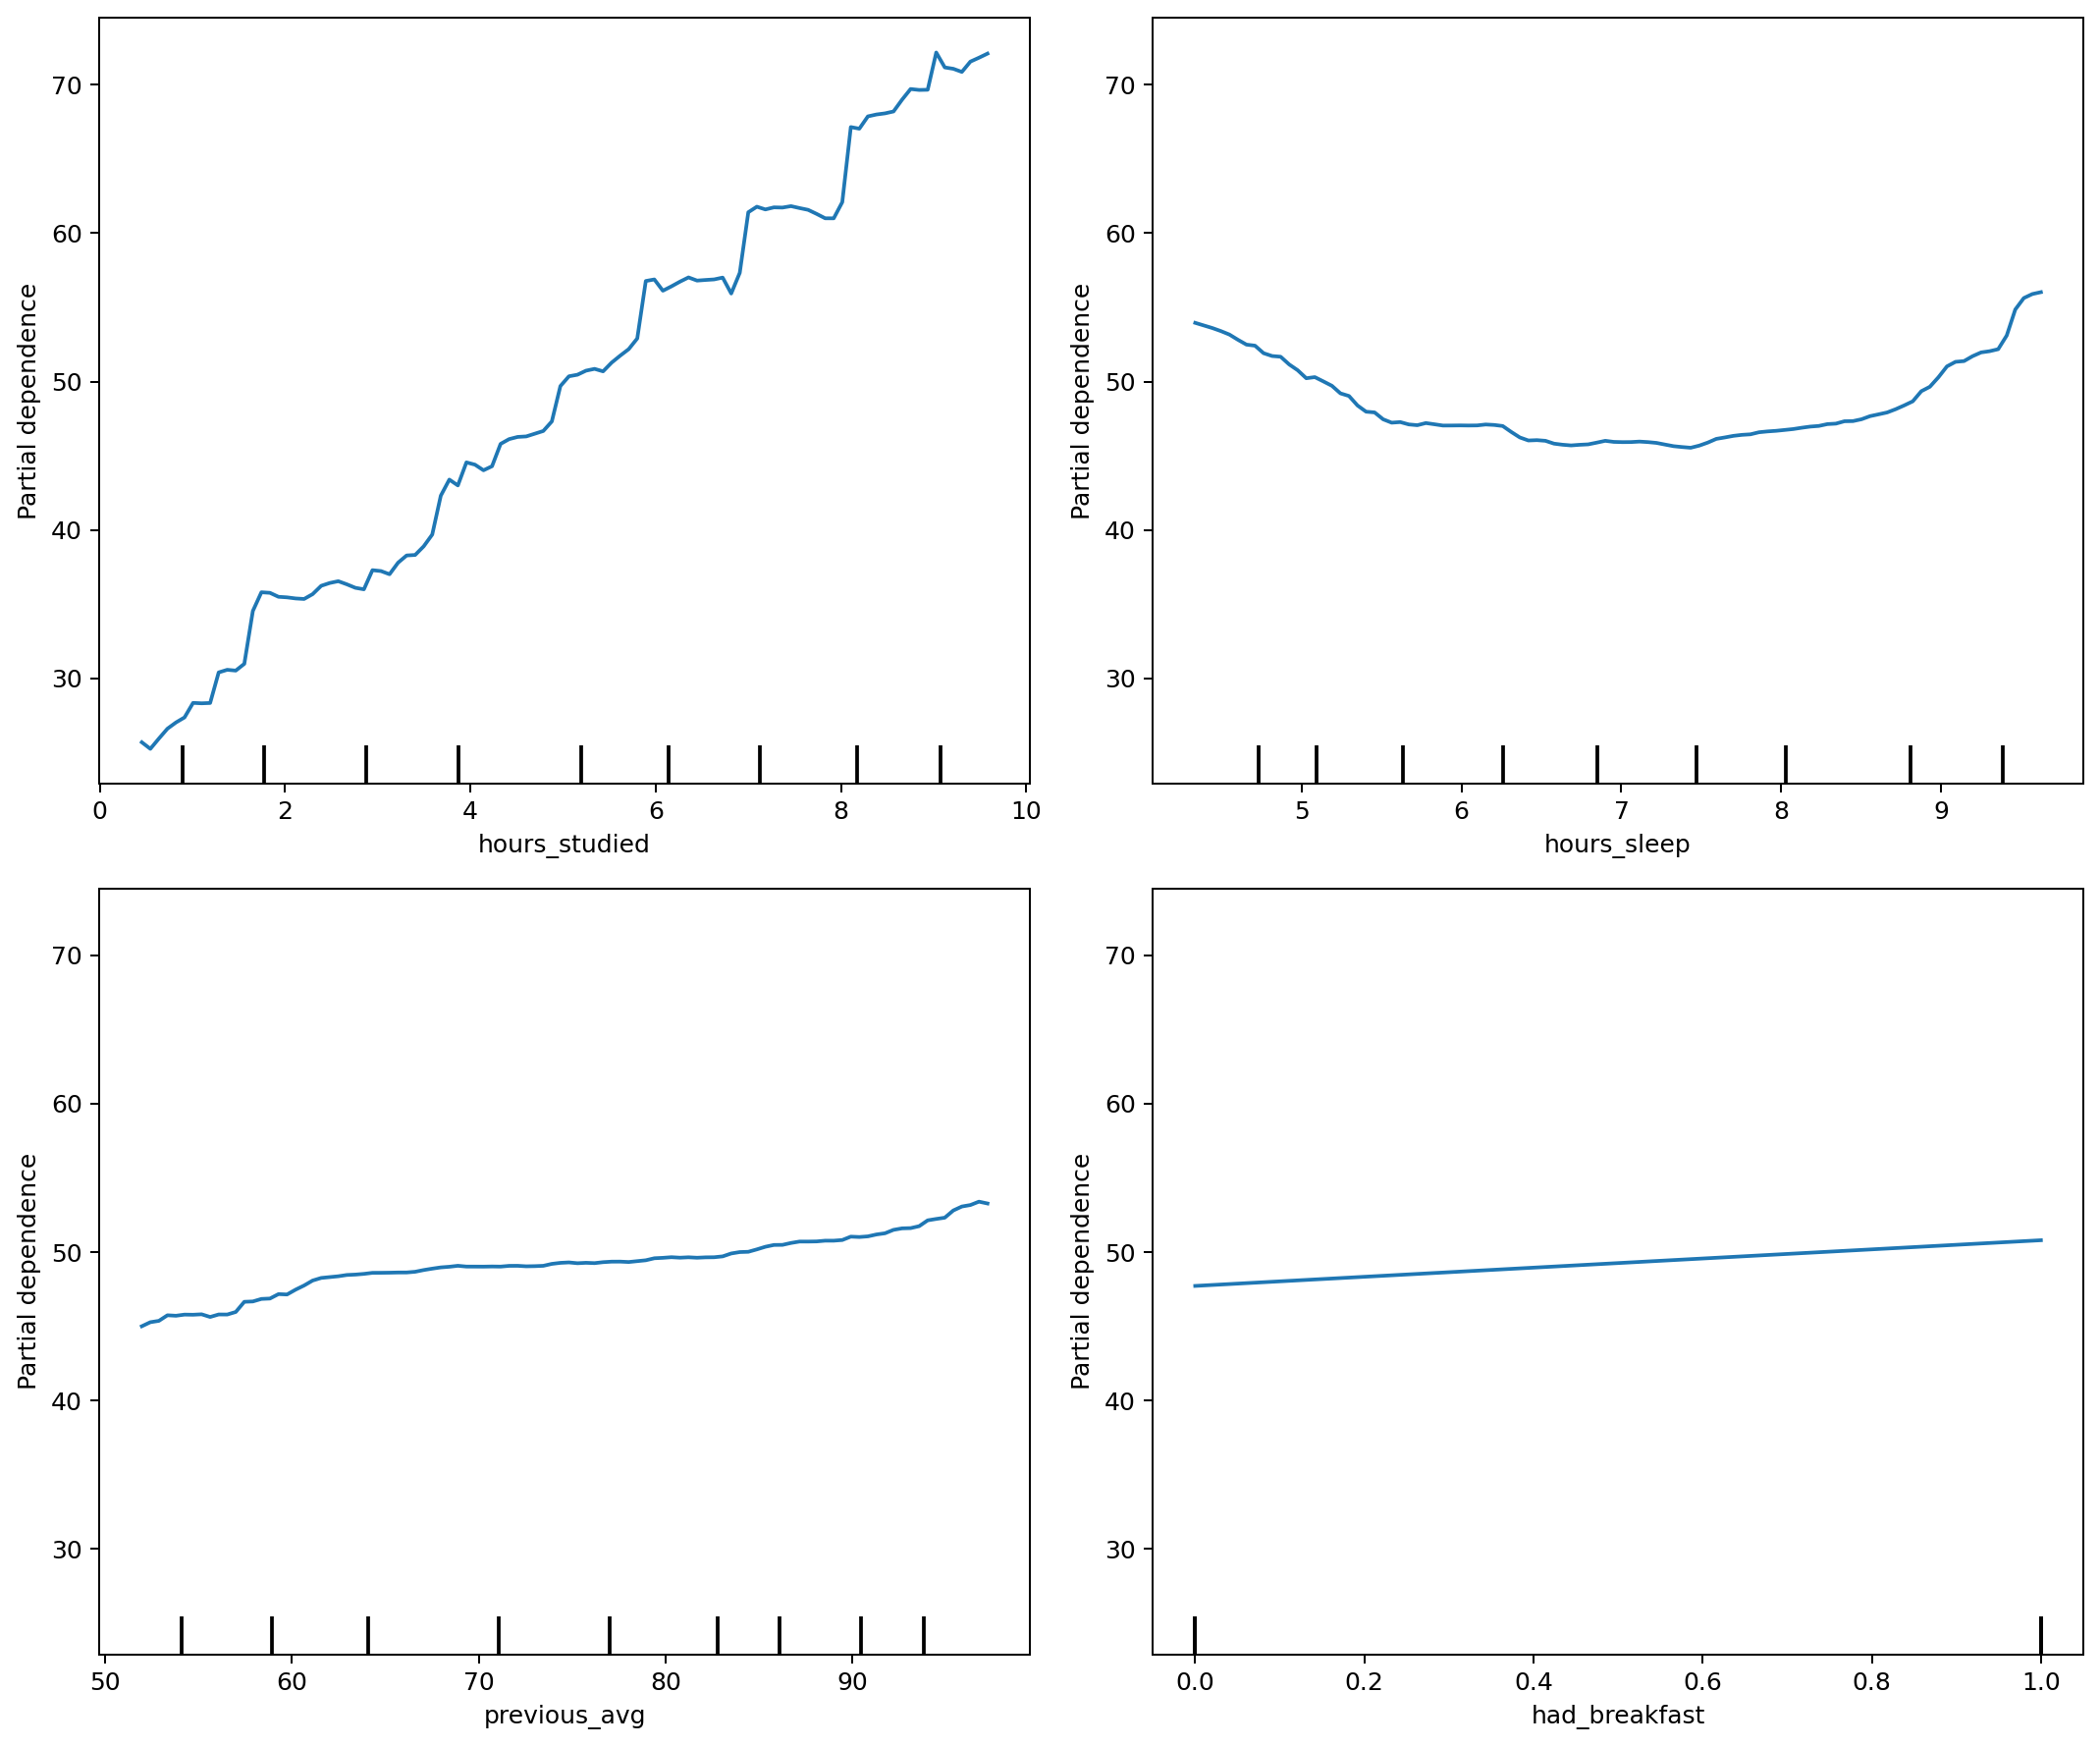

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Create partial dependence plots for all features
features_to_plot = [0, 1, 2, 3]  # Indices of our features
feature_names = ['hours_studied', 'hours_sleep', 'previous_avg', 'had_breakfast']

# Generate and plot the partial dependence
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot, 
    feature_names=feature_names,
    ax=axes
)

plt.tight_layout()
plt.show()

help me understand now 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now we have our partial dependence plots. Let's interpret each one to understand how our model is using each feature to make predictions:

1. **Hours Studied (top left)**:
   - The line shows a strong positive relationship - as study hours increase, the predicted test score increases steadily.
   - This matches our original data design where we gave hours studied a strong positive coefficient (5).
   - The relationship is mostly linear, which the model has captured correctly.

2. **Hours Sleep (top right)**:
   - This plot shows a U-shaped curve, with the lowest point around 6-7 hours.
   - This is interesting because we designed the data with an optimal sleep time of 7 hours (using a quadratic term).
   - The model has captured that both too little and too much sleep can lead to higher scores than the middle range.

3. **Previous Average (bottom left)**:
   - There's a slight positive relationship - as previous average increases, the predicted test score increases slightly.
   - This matches our design where we gave previous average a small coefficient (0.2).
   - The effect is much smaller than hours studied, which aligns with our data generation.

4. **Had Breakfast (bottom right)**:
   - There's a positive effect of having breakfast (moving from 0 to 1).
   - The increase is about 3-4 points, which is close to the 5-point boost we designed into the data.

These plots reveal how each feature independently affects the model's predictions, after averaging out the effects of all other features. This is exactly what partial dependence plots are designed to show!

Would you like to explore any specific aspect of these plots in more detail?

next step

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Now let's explore feature interactions using 2D partial dependence plots. These can show us how two features jointly affect the model's predictions, which can reveal interactions that aren't visible in the individual plots.

For example, we might wonder: Does the effect of study hours change depending on whether a student had breakfast? Let's create a 2D partial dependence plot to find out:

```python
# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create 2D partial dependence plot for hours_studied and had_breakfast
features_to_plot = [(0, 3)]  # hours_studied and had_breakfast

# Generate and plot the 2D partial dependence
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot, 
    feature_names=feature_names,
    ax=ax,
    kind='both'  # Show both contour and individual plots
)

plt.tight_layout()
plt.show()
```

This will create a 2D partial dependence plot showing how hours studied and breakfast together affect the predicted test score. Would you like to run this code?

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[1], line 8
      5 features_to_plot = [(0, 3)]  # hours_studied and had_breakfast
      7 # Generate and plot the 2D partial dependence
----> 8 display = PartialDependenceDisplay.from_estimator(
      9     model, X_train, features_to_plot, 
     10     feature_names=feature_names,
     11     ax=ax,
     12     kind='both'  # Show both contour and individual plots
     13 )
     15 plt.tight_layout()
     16 plt.show()

File ~/.local/lib/python3.11/site-packages/sklearn/inspection/_plot/partial_dependence.py:593, in PartialDependenceDisplay.from_estimator(cls, estimator, X, features, sample_weight, categorical_features, feature_names, target, response_method, n_cols, grid_resolution, percentiles, method, n_jobs, verbose, line_kw, ice_lines_kw, pd_line_kw, contour_kw, ax, kind, centered, subsample, random_state)
    586 if any(i

ValueError: ICE plot cannot be rendered for 2-way feature interactions. 2-way feature interactions mandates PD plots using the 'average' kind: features=[(0, 3)] should be configured to use kind=['average'] explicitly.

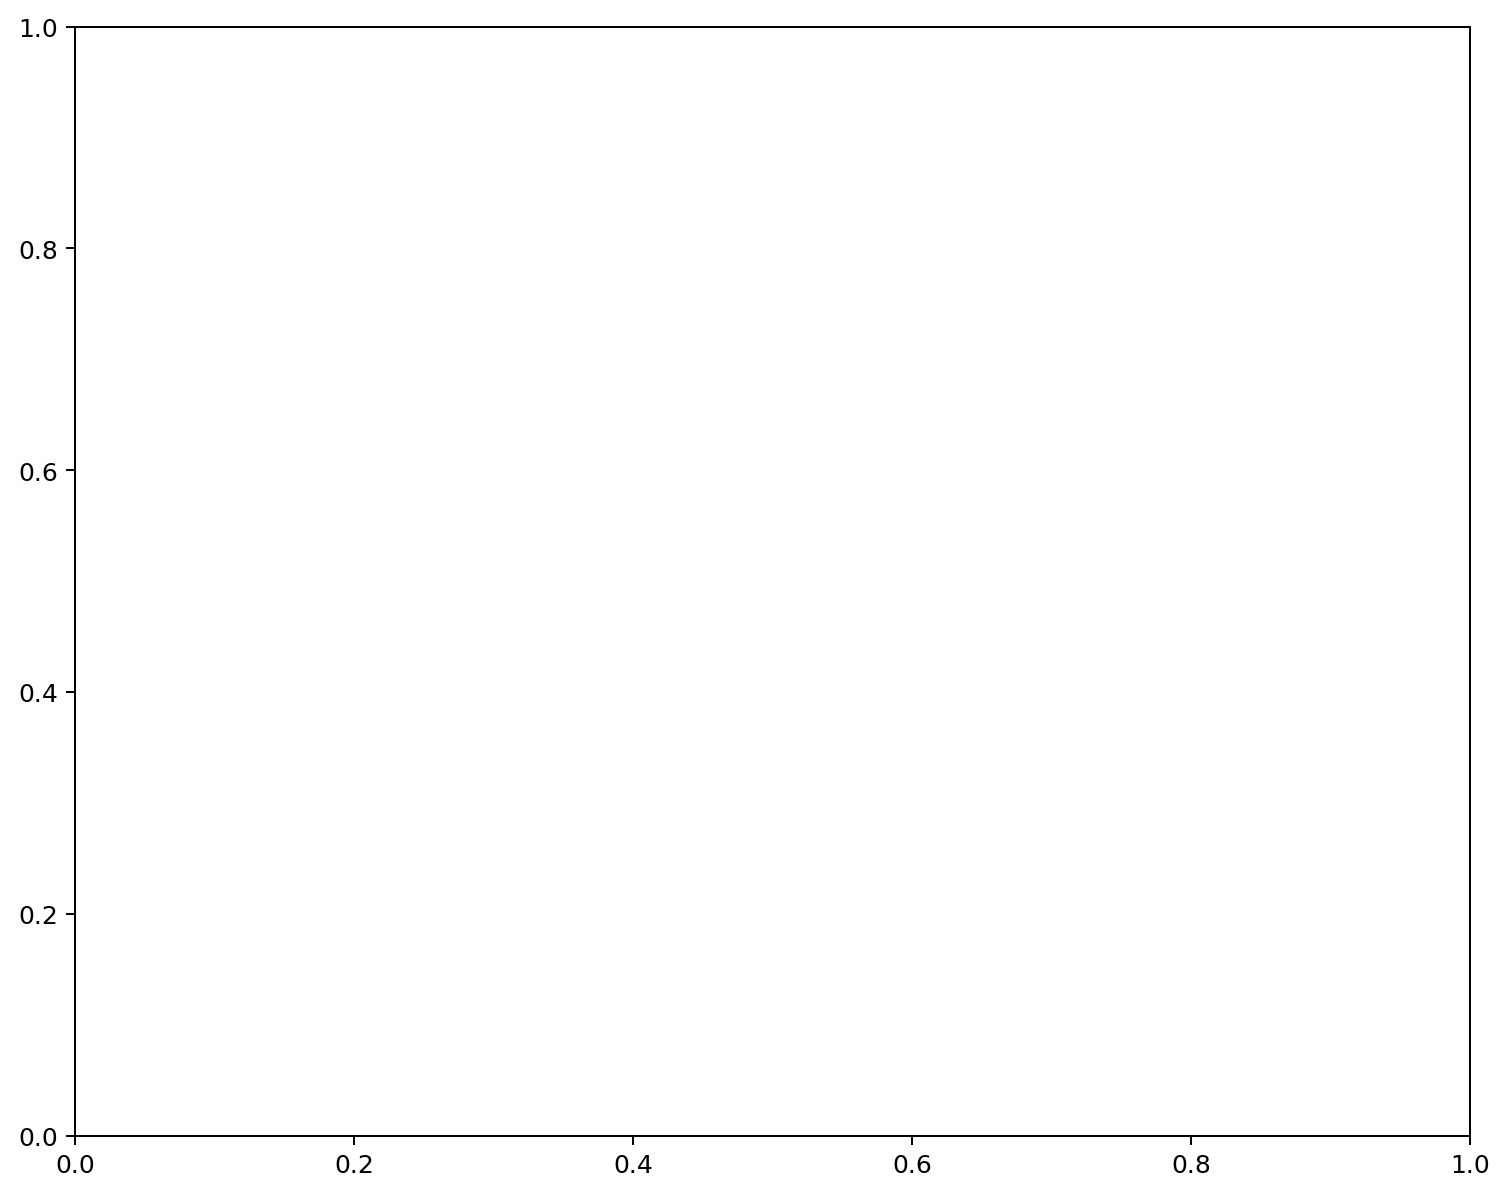

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create 2D partial dependence plot for hours_studied and had_breakfast
features_to_plot = [(0, 3)]  # hours_studied and had_breakfast

# Generate and plot the 2D partial dependence
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot, 
    feature_names=feature_names,
    ax=ax,
    kind='both'  # Show both contour and individual plots
)

plt.tight_layout()
plt.show()


help me fix iisue..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

It looks like we need to fix the error with our 2D partial dependence plot. The error message tells us that we can't use 'both' for the kind parameter when creating 2D plots - we need to use 'average' instead. Let's update the code:

```python
# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create 2D partial dependence plot for hours_studied and had_breakfast
features_to_plot = [(0, 3)]  # hours_studied and had_breakfast

# Generate and plot the 2D partial dependence
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot, 
    feature_names=feature_names,
    ax=ax,
    kind='average'  # Changed from 'both' to 'average'
)

plt.tight_layout()
plt.show()
```

This should create a 2D contour plot showing how hours studied and breakfast together affect the predicted test score.

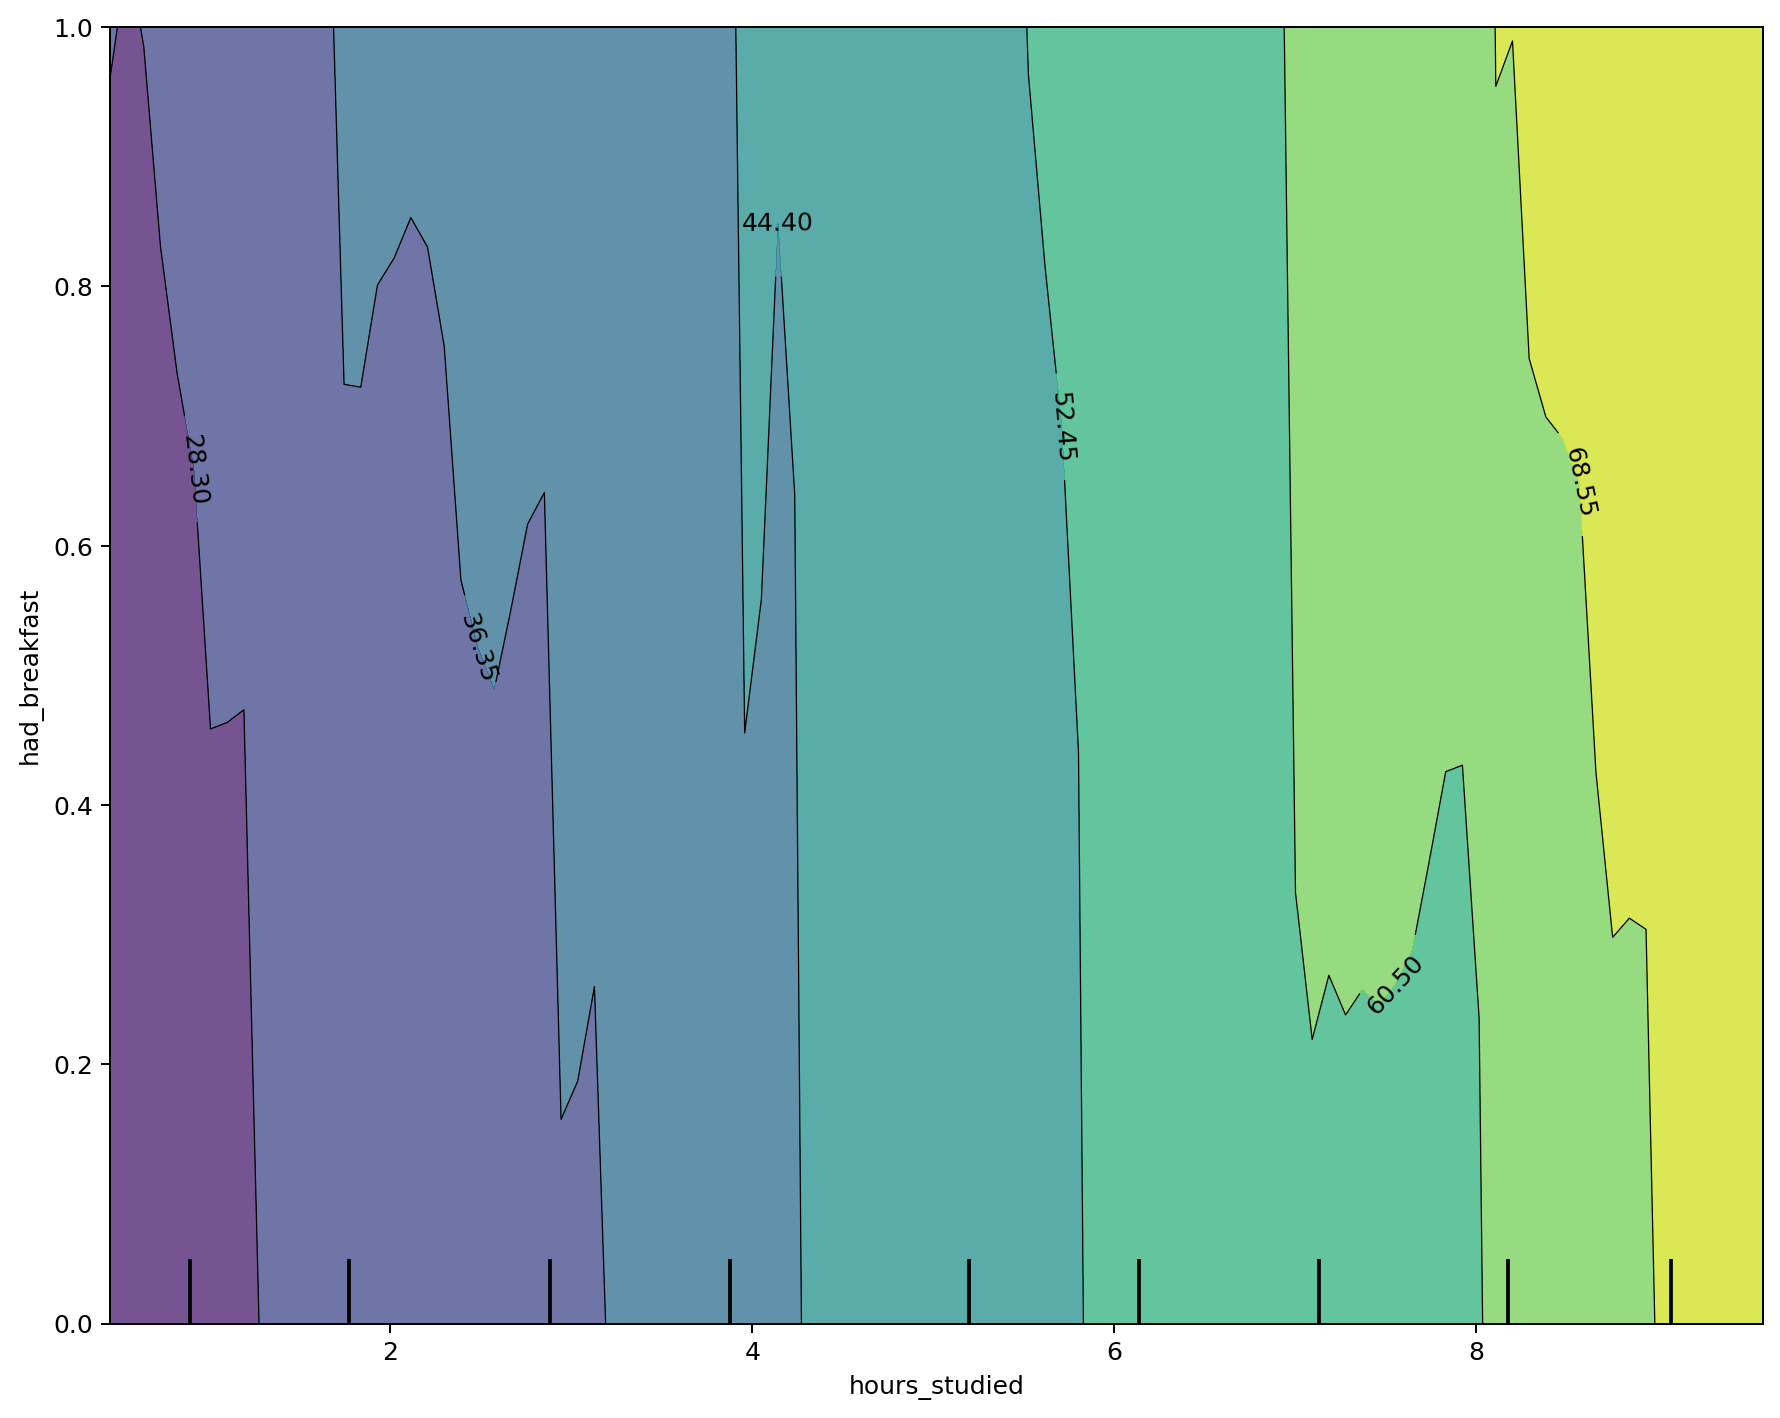

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create 2D partial dependence plot for hours_studied and had_breakfast
features_to_plot = [(0, 3)]  # hours_studied and had_breakfast

# Generate and plot the 2D partial dependence
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot, 
    feature_names=feature_names,
    ax=ax,
    kind='average'  # Changed from 'both' to 'average'
)

plt.tight_layout()
plt.show()


help me understand

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now we have a 2D partial dependence plot that shows how hours studied and having breakfast jointly affect the predicted test scores. Let's interpret this:

The contour plot shows different colors representing different predicted test scores:
- The darkest purple areas (left side) represent the lowest predicted scores (around 28-30)
- The brightest yellow areas (right side) represent the highest predicted scores (around 65-70)

Here's what we can observe:

1. **The dominant pattern**: Moving from left to right (increasing study hours), the colors change from purple to yellow, showing that more study hours lead to higher predicted scores. This is the strongest effect we see.

2. **Breakfast effect**: Looking at any vertical slice (fixed study hours), there's a slight difference between the top (had breakfast = 1) and bottom (had breakfast = 0). The contour lines show that having breakfast generally increases the predicted score by a few points.

3. **Interaction effects**: The color bands run mostly vertical, which suggests that the effect of study hours doesn't change much whether a student had breakfast or not. If there were strong interactions, we'd see diagonal or curved contour lines.

This visualization confirms what we saw in the individual plots:
- Hours studied has the strongest effect on test scores
- Having breakfast provides a small boost
- The effects appear to be mostly additive rather than interactive

Is there any specific aspect of this plot you'd like me to explain in more detail?

i am not getting this plot

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I understand the 2D plot can be a bit confusing at first. Let me break it down more simply:

Think of this plot as a map where:
- The x-axis (horizontal) shows hours studied (from 0 to 10)
- The y-axis (vertical) shows whether a student had breakfast (0 = No, 1 = Yes)
- The colors show the predicted test scores

The colors are like elevation on a map:
- Purple/blue areas (left side) = low test scores
- Green/yellow areas (right side) = high test scores

The numbers on the contour lines (like 44.40, 52.45, etc.) are the predicted test scores along those lines.

What this plot is telling us:
1. As you move from left to right (study more hours), the colors change from blue to yellow, meaning scores increase
2. There's a slight difference between the top half (had breakfast) and bottom half (no breakfast) of the plot

Would it help if we tried a different way to visualize this relationship? Or would you like me to explain a specific part of the plot that's confusing?

yes try some other way... i am not geetting that...

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's try a different approach to visualize the relationship between hours studied, breakfast, and test scores. Instead of a contour plot, let's create separate line plots for students who had breakfast and those who didn't:

```python
# Get partial dependence values for hours_studied and had_breakfast
pd_results = partial_dependence(
    model, X_train, features=[0], 
    feature_names=feature_names,
    categorical_features=[3]  # Specify had_breakfast as categorical
)

# Extract the values
hours_studied_values = pd_results["values"][0]
pd_breakfast_0 = pd_results["average"][0][:, 0]  # PD values when had_breakfast=0
pd_breakfast_1 = pd_results["average"][0][:, 1]  # PD values when had_breakfast=1

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(hours_studied_values, pd_breakfast_0, 'b-', label='No Breakfast')
plt.plot(hours_studied_values, pd_breakfast_1, 'r-', label='Had Breakfast')
plt.xlabel('Hours Studied')
plt.ylabel('Predicted Test Score')
plt.title('Effect of Hours Studied on Test Score by Breakfast Status')
plt.legend()
plt.grid(True)
plt.show()
```

Let's see if this makes the relationship clearer. This will show two lines - one for students who had breakfast and one for those who didn't - and how their predicted scores change as study hours increase.

In [ ]:
# Get partial dependence values for hours_studied and had_breakfast
pd_results = partial_dependence(
    model, X_train, features=[0], 
    feature_names=feature_names,
    categorical_features=[3]  # Specify had_breakfast as categorical
)

# Extract the values
hours_studied_values = pd_results["values"][0]
pd_breakfast_0 = pd_results["average"][0][:, 0]  # PD values when had_breakfast=0
pd_breakfast_1 = pd_results["average"][0][:, 1]  # PD values when had_breakfast=1

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(hours_studied_values, pd_breakfast_0, 'b-', label='No Breakfast')
plt.plot(hours_studied_values, pd_breakfast_1, 'r-', label='Had Breakfast')
plt.xlabel('Hours Studied')
plt.ylabel('Predicted Test Score')
plt.title('Effect of Hours Studied on Test Score by Breakfast Status')
plt.legend()
plt.grid(True)
plt.show()


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[1], line 2
      1 # Get partial dependence values for hours_studied and had_breakfast
----> 2 pd_results = partial_dependence(
      3     model, X_train, features=[0], 
      4     feature_names=feature_names,
      5     categorical_features=[3]  # Specify had_breakfast as categorical
      6 )
      8 # Extract the values
      9 hours_studied_values = pd_results["values"][0]

NameError: name 'partial_dependence' is not defined


NameError: name 'partial_dependence' is not defined